In [1]:
from KalmanFilterModel import *

## Generate inputs

In [2]:
# observation model
H = np.array([[1, 0]])

# continuous time noise variance, must be square
Q = np.array([[0.01]]) 

# observation noise variance, must be square
R = np.array([[1]])

# initial conditions
x0 = np.array([[0]
            ,[0]])

# sample period
dt = 1.0

# number of time-steps to simulate
t_steps = 500

time = range(t_steps+1)

#Transform a continuous to a discrete state-space system.
F = np.array([[1, dt]
            , [0, 1]])

G = np.array([[dt**2/2]
            , [dt]])

# assumes run_sim has been run at least once
Q = Q * 10
R = R * 10

#initial covariance required, P0 has to be of the same dimension as F
P0 = np.ones((2,2)) * 10 * Q 
x0 = np.array([[0]
             , [0]])

## Simulate data

In [3]:
simulate_dta = Simulate(F, G, H, Q, R, x0, t_steps)
print(simulate_dta)
z, x = simulate_dta.simulate()

Simulate data.


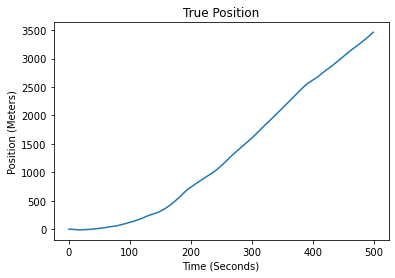

In [4]:
simulate_dta.plot_TruePos(x)

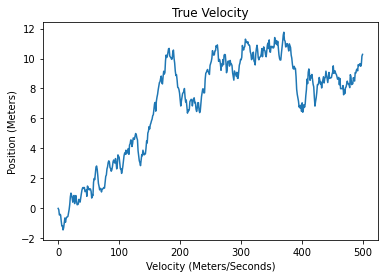

In [9]:
simulate_dta.plot_TrueVelocity(x)

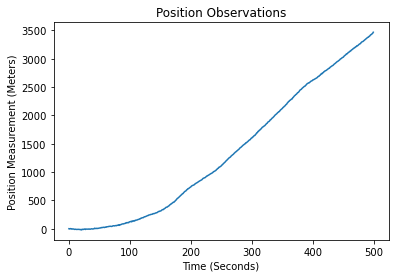

In [10]:
simulate_dta.plot_Obs(z)

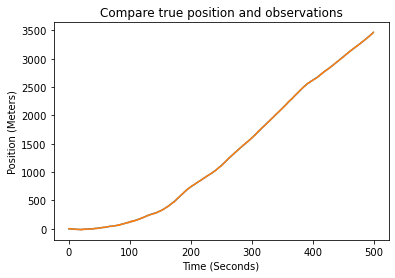

In [11]:
simulate_dta.plot_TruePos_Obs(x, z)

## Apply Kalman Filter

In [5]:
kl = KalmanFilter(F, G, H, Q, R, P0, x0, t_steps, z)
print(kl)
xest, xpred, xinnov = kl.xestim()

Basic Kalman Filter.


No handles with labels found to put in legend.


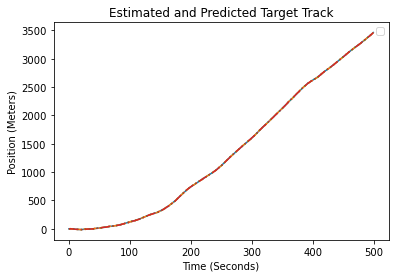

In [6]:
kl.plot_est_predTrack(x, z, xpred, xest)

No handles with labels found to put in legend.


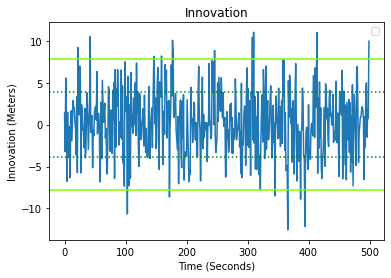

In [7]:
kl.plot_innov(xinnov)

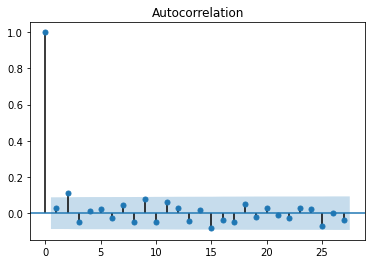

In [8]:
kl.plot_autocorr(xinnov)